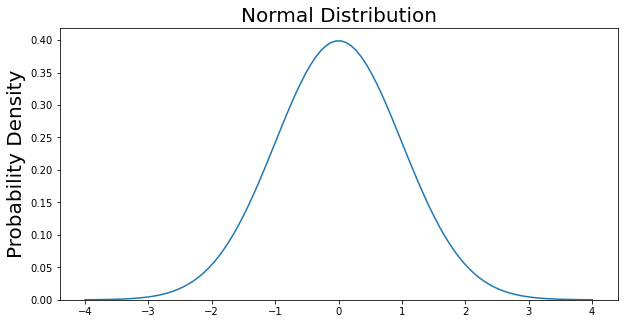

In [1]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

The graph above does not show you the probability of events but their probability density. To get the probability of an event within a given range we will need to integrate. Suppose we are interested in finding the probability of a random data point landing within the interquartile range .6745 standard deviation of the mean, we need to integrate from -.6745 to .6745. This can be done with SciPy.

In [2]:
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )# Integrate PDF from -.6745 to .6745
result_50p, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)
print(result_50p)

0.5000065142726018


The same can be done for minimum and maximum.   The outliers are the remaining .7% percent of the data.

It is important to note that for any PDF, the area under the curve must be 1.

In [3]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

0.9930242559336101


'https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv'


In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/BreastCancerWisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The boxplots can be made through matplotlib. This approach can be far more tedious, but can give you a greater level of control.

{'whiskers': [<matplotlib.lines.Line2D at 0x1b0c0b6d460>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0c0b6db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b0c0b6d1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1b0c0d022e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b0c0d02670>,
 'means': []}

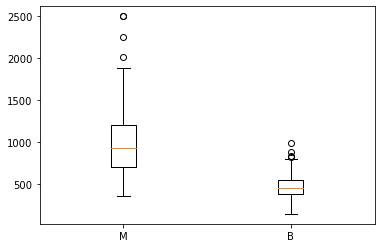

In [5]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], labels=['M', 'B'])

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

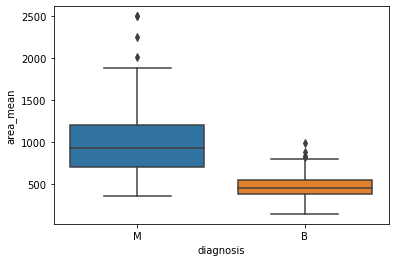

In [6]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)

You can plot a boxplot by invoking .boxplot() on your DataFrame. The code below makes a boxplot of the area_mean column with respect to different diagnosis.


Text(0.5, 1.0, '')

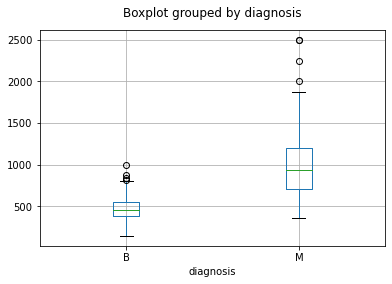

In [7]:
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('')

The <b>notched boxplot</b> allows you to evaluate confidence intervals (by default 95% confidence interval) for the medians of each boxplot.

Using the graph, we can compare the range and distribution of the area_mean for malignant and benign diagnosis. We observe that there is a greater variability for malignant tumor area_mean as well as larger outliers.


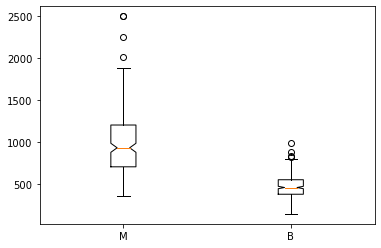

In [8]:
malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant,benign], notch = True, labels=['M', 'B']);